   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

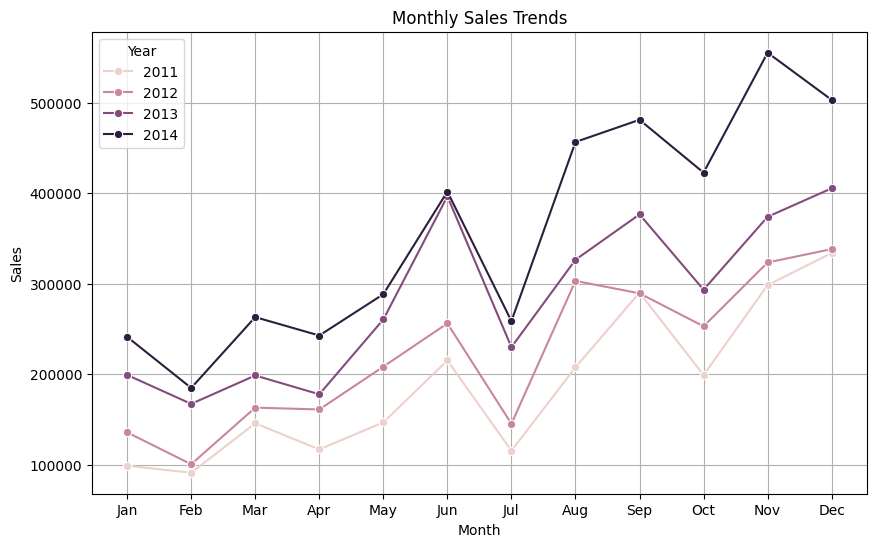


Top 10 Best-Selling Products:
Product Name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: Quantity, dtype: int64


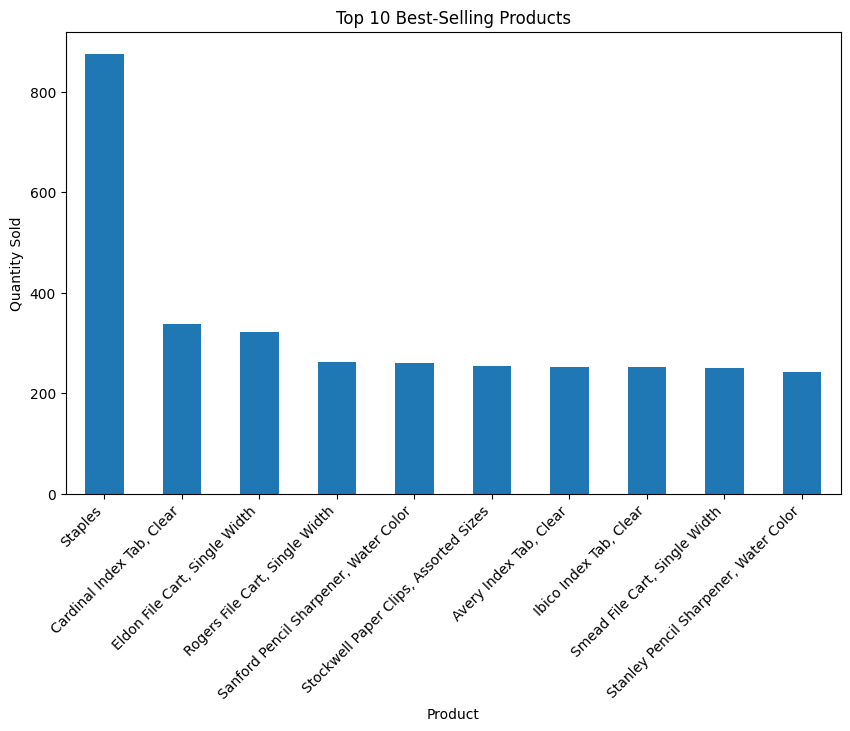

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'ECOMM DATA.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Calculate total sales
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)

# Convert 'Order Date' column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by year and month, then calculate total sales for each month
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plot monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)plt.show()

# Determine best-selling products
best_selling_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Best-Selling Products:")
print(best_selling_products)

# Visualize top 10 best-selling products
plt.figure(figsize=(10, 6))
best_selling_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()